# Verificando se houve alguma melhora após o Hacking Health

Após a apresentação da Larissa Lautert, no Pyladies (https://www.sympla.com.br/6-pyladies-floripa---digitro__319770) que relatou como a lista de espera do SUS de SC poderia diminuir consideravelmente cas fossem eliminados registros duplicado. Fiquei curioso se foi feito alguma coisa quase 8 meses após a apresentação destes dados.

Dados da apresentação da Larissa:
https://github.com/llautert/hacking-health-sc-2017

Ao baixar os dados do site https://listadeespera.saude.sc.gov.br/consulta/completa.html, verifiquei o seguinte:
* Não achei API para facilitar o trabalho (que novidade...)
* A maneira mais rápida foi baixar separando por central de regulação, demorou cerca de 3 horas e baixou quase 750 mil solicitações de procedimento na lista de espera. Mas não havia uma coluna identificando a cidade de origem.
* Modifiquei o crawler para baixar e identificar cada município já que não havia este registro. Demorou cerca de 12h e retornou apenas pouco mais de 300 mil solicitações. Concluí que (a não ser que eu tenha feito alguma barbeiragem) mais da metade das solicitações não tinham a denominação da cidade.

Portanto os dados desta análise não puderam ser separado por município (até eu descobrir uma maneira de fazer isso).

In [75]:
import os

import pandas as pd
pd.set_option('max_colwidth', 150)
pd.set_option('max_columns', 150)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [76]:
# # consegui separar por cidade, mas assim ele gravou somente 300k na fila
# # tem pedidos sem registro de cidade? Fiz alguma bobagem?
# # Alguns pedidos parecem estar sendo solicitados diretamente na central de regulação, 
# # talvez isso acabe não sendo registrados em nenhum municipio

# # SEPARANDO POR CIDADE
# lista_df = []
# folder = 'produced_datasets/'
# dtype = {
#     '_id': 'str',
#     'cpf': 'str',
#     'cnes': 'str',
#     'cns': 'str',
#     'classificacaoRisco': 'category',
#     'tipoFila': 'category',
# #     'estimativaAtendimento': 'int',
#     'codigoSolicitacao': 'str',
#     'especialidade': 'str',
# #     'posicao': 'int',
# #     'previsaoAtendimentoPaciente': 'int',
# #     'producaoMensalProcedimento': 'int'
# }

# l = os.listdir(folder)
# l.remove('old')
# for arq in l:
#     parse_dates = ['dataEntrada', 'dataNascimento']
#     temp = pd.read_csv(folder + arq, index_col=0, dtype=dtype, parse_dates=True)
#     lista_df.append(temp)
# df = pd.concat(lista_df, sort=True)
# df.set_index('_id', inplace=True)


# df.dataEntrada = pd.to_datetime(df.dataEntrada)
# df.dataEntrada = df['dataEntrada'].dt.to_period('d')
# df.dataNascimento = pd.to_datetime(df.dataNascimento)
# df.dataNascimento = df.dataNascimento.dt.to_period('d')

In [77]:
# baixando somente separado por centro de regulação ele gravou mais de 750k na fila
# mas estes não estão separados por cidade
# posso chegar à cidade atraves do estabelecimento solicitante?

# SEM separar por cidade
lista_df = []
folder = 'produced_datasets/old/'
dtype = {
    '_id': 'str',
    'cpf': 'str',
    'cnes': 'str',
    'cns': 'str',
    'classificacaoRisco': 'category',
    'tipoFila': 'category',
    'codigoSolicitacao': 'str',
    'especialidade': 'str',
}

l = os.listdir(folder)
for arq in l:
    parse_dates = ['dataEntrada', 'dataNascimento']
    temp = pd.read_csv(folder + arq, index_col=0, dtype=dtype, parse_dates=True)
    lista_df.append(temp)
df = pd.concat(lista_df, sort=True)
df.set_index('_id', inplace=True)


df.dataEntrada = pd.to_datetime(df.dataEntrada)
# df.dataEntrada = df['dataEntrada'].dt.to_period('d')
df.dataNascimento = pd.to_datetime(df.dataNascimento)
df.dataNascimento = df.dataNascimento.dt.to_period('d')

In [78]:
df.shape

(749846, 21)

* A fila diminuiu bastante, comparando com o estudo da Larissa.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749846 entries, 227007096 to 228710345
Data columns (total 21 columns):
centralSolicitante             749846 non-null object
classificacaoRisco             749846 non-null object
cnes                           749846 non-null object
cns                            749846 non-null object
codigoSolicitacao              749846 non-null object
cpf                            674014 non-null object
dataEntrada                    749846 non-null datetime64[ns]
dataNascimento                 749846 non-null object
descricaoSIGTAP                748265 non-null object
especialidade                  0 non-null object
estabelecimentoSolicitante     749846 non-null object
estimativaAtendimento          652668 non-null float64
grupoProcedimentoDescricao     705259 non-null object
idLista                        749846 non-null object
modalidade                     749846 non-null object
nome                           749846 non-null object
posicao        

In [80]:
df.sample(10)

,centralSolicitante,classificacaoRisco,cnes,cns,codigoSolicitacao,cpf,dataEntrada,dataNascimento,descricaoSIGTAP,especialidade,estabelecimentoSolicitante,estimativaAtendimento,grupoProcedimentoDescricao,idLista,modalidade,nome,posicao,previsaoAtendimentoPaciente,procedimentoDescricao,producaoMensalProcedimento,tipoFila
_id,,,,,,,,,,,,,,,,,,,,,
242928051,BLUMENAU,4,7859252,702404527488322,242928051,80056717920,2018-05-30 13:52:22.657,1974-02-02,ULTRASSONOGRAFIA DOPPLER COLORIDO DE VASOS,NaN,POLICLINICA LINDOLF BELL,841.0,ULTRA-SONOGRAFIA DOPPLER - VENOSO MEMBRO INFERIOR E (3 VASOS),5b6f7f1283fedb1d9426b885,exame,H T,965.0,730.0,ULTRA-SONOGRAFIA DOPPLER - VENOSO MEMBRO INFERIOR E (3 VASOS),40.0,2
241479350,ARARANGUA,4,6490212,706809204767428,241479350,02996193970,2018-05-19 11:25:50.220,1980-10-14,CONSULTA MEDICA EM ATENÇÃO ESPECIALIZADA,NaN,PSF JARDIM CIBELE,158.0,CONSULTA EM UROLOGIA - ADULTO,5b6f79ae83fedb1d942611dc,consulta,A M M,441.0,478.0,CONSULTA EM UROLOGIA - ADULTO,28.0,1
223554373,SAO JOSE,4,5908418,700605452699464,223554373,48201421000,2017-12-08 10:00:47.288,1966-05-10,ULTRASSONOGRAFIA DE ARTICULACAO,NaN,CENTRO DE SAUDE AREIAS,527.0,ULTRA-SONOGRAFIA DE ARTICULACAO OMBRO DIREITO,5b6f6d2483fedb1d9422cba0,exame,M T A D S,14669.0,9430.0,ULTRA-SONOGRAFIA DE ARTICULACAO OMBRO DIREITO,47.0,1
243470409,OTACILIO COSTA,4,2692260,706006824482149,243470409,89186516949,2018-06-04 16:02:18.383,1974-04-01,ESPIROMETRIA OU PROVA DE FUNCAO PULMONAR COMPLETA COM BRONCODILATADOR,NaN,SECRETARIA DE SAUDE OTACILIO COSTA,262.0,ESPIROMETRIA,5b6f779283fedb1d94258283,exame,M H D L S,313.0,42.0,ESPIROMETRIA,222.0,1
192345078,CANELINHA,2,2692260,707804667876519,192345078,07099923943,2017-02-22 14:35:11.288,1990-01-25,CONSULTA MEDICA EM ATENÇÃO ESPECIALIZADA,NaN,POSTO SAUDE SEDE,790.0,CONSULTA EM POLISSONOGRAFIA,5b6f74fe83fedb1d9424d60c,consulta,A D S,122.0,200.0,CONSULTA EM POLISSONOGRAFIA,18.0,1
202858712,SAO JOSE,3,2692260,705807454290238,202858712,86722557987,2017-06-07 10:49:32.150,1974-01-13,CONSULTA MEDICA EM ATENÇÃO ESPECIALIZADA,NaN,CENTRO DE SAUDE LUAR,406.0,CONSULTA EM OFTALMOLOGIA ADULTO,5b6f717a83fedb1d9423eb4f,consulta,M A P,1772.0,253.0,CONSULTA EM OFTALMOLOGIA ADULTO,210.0,1
244822177,ITAJAI,4,9208305,700008063150907,244822177,89848594949,2018-06-14 15:46:23.461,1972-06-11,CONSULTA MEDICA EM ATENÇÃO ESPECIALIZADA,NaN,UNIDADE BASICA DE SAUDE COSTA CAVALCANTE,41.0,CONSULTA EM OFTALMOLOGIA ADULTO,5b6f87fa83fedb1d942909b2,consulta,J A C,474.0,23.0,CONSULTA EM OFTALMOLOGIA ADULTO,619.0,2
235178925,FLORIANOPOLIS,4,2692260,704001802164666,235178925,05549553937,2018-03-26 10:00:12.256,1984-04-10,CONSULTA MEDICA EM ATENÇÃO ESPECIALIZADA,NaN,CS JARDIM ATLANTICO,413.0,CONSULTA EM CIRURGIA VASCULAR - ADULTO,5b6f728883fedb1d94243220,consulta,D V M,2687.0,565.0,CONSULTA EM CIRURGIA VASCULAR - ADULTO,143.0,1
240573446,SAO JOSE,3,2692260,700707921399175,240573446,53340221987,2018-05-09 09:18:15.392,1957-06-22,ECOCARDIOGRAFIA TRANSTORACICA,NaN,CENTRO DE SAUDE PICADAS DO SUL,940.0,ECOCARDIOGRAFIA BI-DIMENSIONAL COM OU SEM DOPPLER,5b6f764883fedb1d94252c95,exame,V A B,1356.0,150.0,ECOCARDIOGRAFIA BI-DIMENSIONAL COM OU SEM DOPPLER,271.0,1


In [81]:
df.describe()

,estimativaAtendimento,posicao,previsaoAtendimentoPaciente,producaoMensalProcedimento
count,652668.000000,749846.000000,7.498460e+05,749846.000000
mean,248.797300,1612.534095,3.829696e+03,217.267148
std,360.106446,2722.594512,3.943105e+04,482.820488
min,0.000000,1.000000,0.000000e+00,0.000000
25%,68.000000,121.000000,2.700000e+01,7.000000
50%,144.000000,540.000000,1.460000e+02,55.000000
75%,267.000000,1849.000000,6.090000e+02,186.000000
max,2275.000000,19971.000000,1.794960e+06,9164.000000


## a mediana de tempo de espera é de 146 dias.

## Distribuição da previsão de tempo de espera

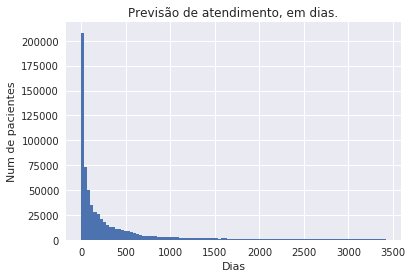

In [82]:
s = df.previsaoAtendimentoPaciente
plt.hist(s[(s < s.quantile(.90))], bins=100) # retirei os 10% mais altos porque tinham outliers muito altos.
plt.title('Previsão de atendimento, em dias.')
plt.xlabel('Dias')
plt.ylabel('Num de pacientes')
plt.show()

## Separando por tipo de procedimento

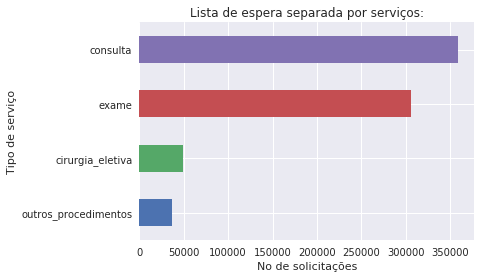

In [83]:
df.groupby('modalidade').size().sort_values().plot(kind='barh')
plt.title('Lista de espera separada por serviços:')
plt.ylabel('Tipo de serviço')
plt.xlabel('No de solicitações')
plt.show()

Este ano a fila não tem mais aquele predomínio maior de exames. Diminuiram os repetidos?

## Separando por Central de Regulação

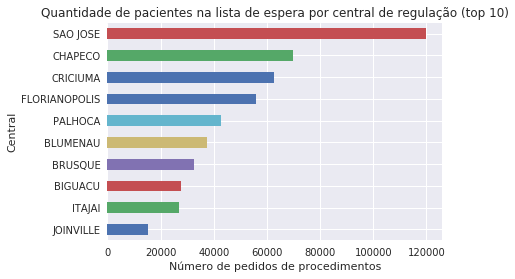

In [84]:
# lista de espera por central de regulação
# não consegui separar por municipio (ainda)

df.groupby('centralSolicitante').size().sort_values().tail(10).plot(kind='barh')
plt.title('Quantidade de pacientes na lista de espera por central de regulação (top 10)')
plt.ylabel('Central')
plt.xlabel('Número de pedidos de procedimentos')
plt.show()

### Por estabelecimento solicitante:

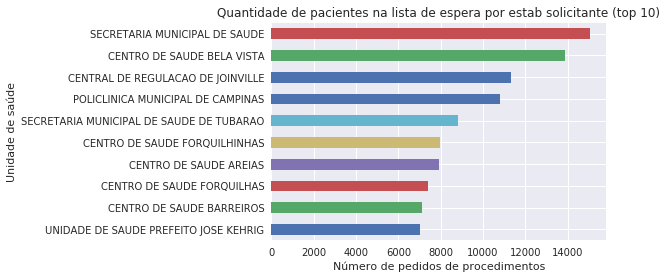

In [85]:
# lista de espera por estab solicitante

df.groupby('estabelecimentoSolicitante').size().sort_values().tail(10).plot(kind='barh')
plt.title('Quantidade de pacientes na lista de espera por estab solicitante (top 10)')
plt.ylabel('Unidade de saúde')
plt.xlabel('Número de pedidos de procedimentos')
plt.show()

Será que 'SECRETARIA MUNICIPAL DE SAUDE' é um nome usado por vários municipios?

## Quantidade de solicitações de procedimentos por modalidade

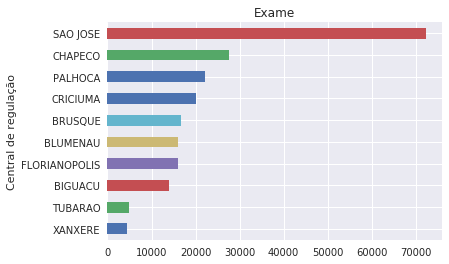

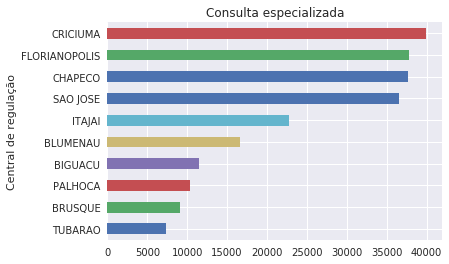

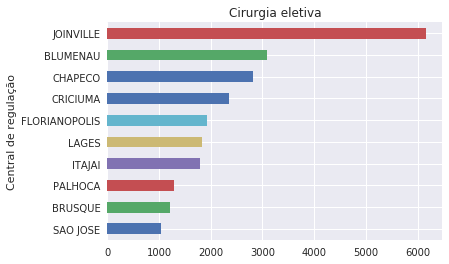

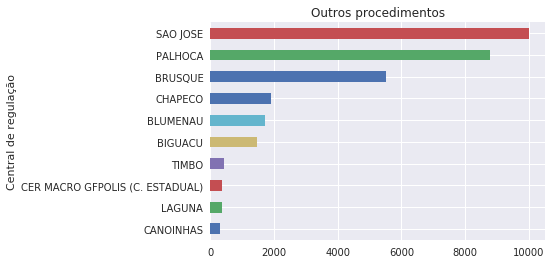

In [86]:
# separando por modalidade

df[df.modalidade == 'exame'].groupby('centralSolicitante').size().sort_values().tail(10).plot(kind='barh')
plt.title('Exame')
plt.ylabel('Central de regulação')
plt.show()

df[df.modalidade == 'consulta'].groupby('centralSolicitante').size().sort_values().tail(10).plot(kind='barh')
plt.title('Consulta especializada')
plt.ylabel('Central de regulação')
plt.show()

df[df.modalidade == 'cirurgia_eletiva'].groupby('centralSolicitante').size().sort_values().tail(10).\
                    plot(kind='barh')
plt.title('Cirurgia eletiva')
plt.ylabel('Central de regulação')
plt.show()

df[df.modalidade == 'outros_procedimentos'].groupby('centralSolicitante').size().sort_values().tail(10).\
                    plot(kind='barh')
plt.title('Outros procedimentos')
plt.ylabel('Central de regulação')
plt.show()

* A central de São José se destaca nos pedidos de exames.
* Se separarmos somente as cirurgias, joinvile tem quase o dobro do segundo colocado.

## Será que eles fizeram algo para modificar os duplicados após o trabalho da Larissa no Hacking Health?

### Dados Absolutos

In [87]:
# verificando os duplicados:
# Quantos procedimentos estão duplicados?

dup = df[df.duplicated(['procedimentoDescricao', 'dataEntrada', 'cpf'], keep='first')].sort_values('cpf')

print()
print('São', dup.shape[0], 'procedimentos duplicados (incluindo o timestamp).')
print('Caso fossem retirados, diminuiria {:.2f}% do total da lista de espera.'.
      format(dup.shape[0] / df.shape[0] * 100 ))



São 39343 procedimentos duplicados (incluindo o timestamp).
Caso fossem retirados, diminuiria 5.25% do total da lista de espera.


In [88]:
# Considerei o mesmo ts quando o pedido foi duplicado no mesmo dia 
# porque tinham registros com a diferença de minutos

df.dataEntrada = df['dataEntrada'].dt.to_period('d')

In [89]:
# verificando os duplicados:
# Quantos procedimentos estão duplicados?


dup = df[df.duplicated(['procedimentoDescricao', 'dataEntrada', 'cpf'], keep='first')].sort_values('cpf')

print()
print('São', dup.shape[0], 'procedimentos duplicados (incluindo o timestamp).')
print('Caso fossem retirados, diminuiria {:.2f}% do total da lista de espera.'.
      format(dup.shape[0] / df.shape[0] * 100 ))
print('''Se contarmos como duplicação os procedimentos agendados no mesmo dia e não só exatamente no mesmo momento, 
quase dobra o número.''')


São 70582 procedimentos duplicados (incluindo o timestamp).
Caso fossem retirados, diminuiria 9.41% do total da lista de espera.
Se contarmos como duplicação os procedimentos agendados no mesmo dia e não só exatamente no mesmo momento, 
quase dobra o número.


In [90]:
# Mantive considerando o ts como sendo o dia, sem considerar o horário

dup_sem_ts = df[df.duplicated(['procedimentoDescricao', 'cpf'], keep='first')].sort_values('cpf')

# tirando os que tem o mesmo ts para achar os que tentaram agendar algum tempo após
# o keep é False porque os primeiros já ficaram no df na primeira fatia
dup_sem_ts = dup_sem_ts.drop_duplicates(['procedimentoDescricao', 'dataEntrada', 'cpf'], keep=False)

print()
print('''Quando há pedidos repetidos, feitos em dias diferentes, podem indicar que o paciente 
cansou de esperar (ou esqueceu o dia marcado) e foi novamente à unidade para ver se marcando novamente 
consegue um exame mais rápido.''')
print('Estes representam', dup_sem_ts.shape[0], 'procedimentos.')
print('Uma diminuição de {:.2f}% da lista de espera caso fossem retirados os repetidos e mantidos somente um.'.
      format(dup_sem_ts.shape[0] / df.shape[0] * 100))


Quando há pedidos repetidos, feitos em dias diferentes, podem indicar que o paciente 
cansou de esperar (ou esqueceu o dia marcado) e foi novamente à unidade para ver se marcando novamente 
consegue um exame mais rápido.
Estes representam 62736 procedimentos.
Uma diminuição de 8.37% da lista de espera caso fossem retirados os repetidos e mantidos somente um.


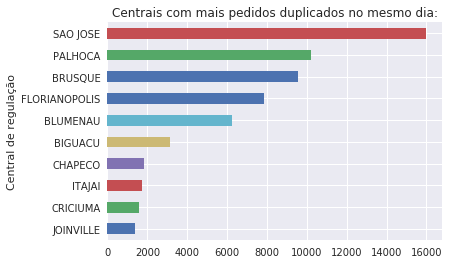

In [91]:
dup.groupby('centralSolicitante').size().sort_values().tail(10).plot(kind='barh')
plt.title('Centrais com mais pedidos duplicados no mesmo dia:')
plt.ylabel('Central de regulação')
plt.show()

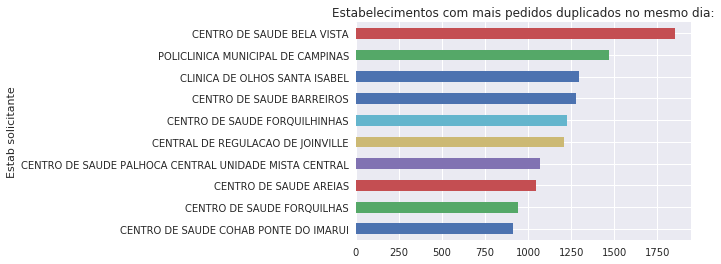

In [92]:
dup.groupby('estabelecimentoSolicitante').size().sort_values().tail(10).plot(kind='barh')
plt.title('Estabelecimentos com mais pedidos duplicados no mesmo dia:')
plt.ylabel('Estab solicitante')
plt.show()

### Percentual de repetidos

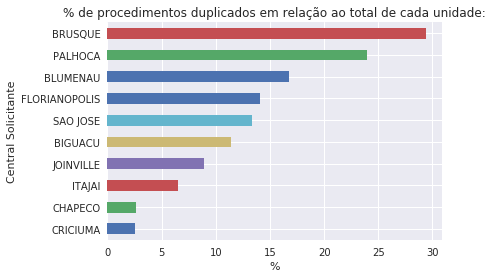

In [93]:
index_dup = dup.groupby('centralSolicitante').size().sort_values().tail(10).index

val = []
for i in index_dup:
    val.append(round(len(dup[dup.centralSolicitante == i]) / len(df[df.centralSolicitante == i]) * 100, 2))

pd.Series(val, index=index_dup).sort_values().plot(kind='barh')
plt.title('% de procedimentos duplicados em relação ao total de cada unidade:')
plt.xlabel('%')
plt.ylabel('Central Solicitante')
plt.show()

Na central de Brusque eles duplicam quase 30% de seus exames.

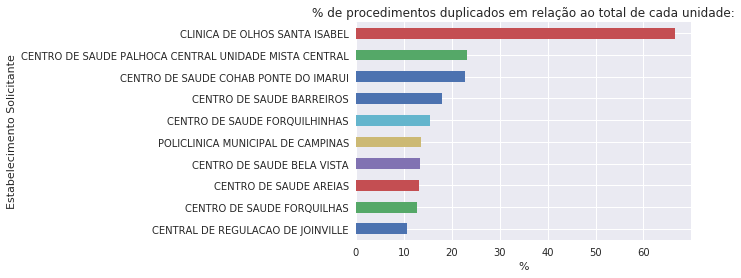

In [94]:
index_dup = dup.groupby('estabelecimentoSolicitante').size().sort_values().tail(10).index

val = []
for i in index_dup:
    val.append(round(len(dup[dup.estabelecimentoSolicitante == i]) / 
                     len(df[df.estabelecimentoSolicitante == i]) * 100, 2))

pd.Series(val, index=index_dup).sort_values().plot(kind='barh')
plt.title('% de procedimentos duplicados em relação ao total de cada unidade:')
plt.xlabel('%')
plt.ylabel('Estabelecimento Solicitante')
plt.show()

A Clinica de Olhos Santa Isabel tem mais de 60% de todos os seus pedidos duplicados.

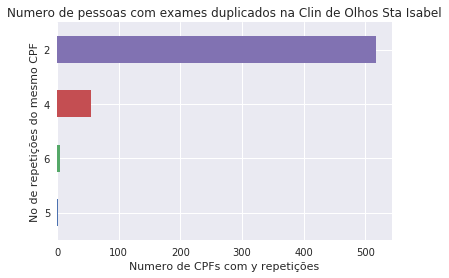

In [95]:
dup[dup.estabelecimentoSolicitante == 'CLINICA DE OLHOS SANTA ISABEL'].groupby('cpf').size().sort_values()\
.value_counts(ascending=True).plot(kind='barh')
plt.title('Numero de pessoas com exames duplicados na Clin de Olhos Sta Isabel')
plt.ylabel('No de repetições do mesmo CPF')
plt.xlabel('Numero de CPFs com y repetições')
plt.show()

Mais de 500 CPFs tem 2 repetições de exames. Sem contar o pedido original.

## Top CPFs duplicados

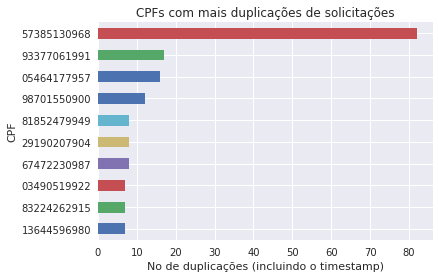

In [96]:
dup.groupby('cpf').size().sort_values().tail(10).plot(kind='barh')
plt.title('CPFs com mais duplicações de solicitações')
plt.ylabel('CPF')
plt.xlabel('No de duplicações (incluindo o timestamp)')
plt.show()

Tem um CPF com 82 duplicados.

In [97]:
df[df.cpf == '57385130968'][['centralSolicitante', 'dataEntrada', 'estabelecimentoSolicitante', 
                            'procedimentoDescricao']]

,centralSolicitante,dataEntrada,estabelecimentoSolicitante,procedimentoDescricao
_id,,,,
235405103,ITAJAI,2018-03-28,UNIDADE BASICA DE SAUDE CIDADE NOVA II,CONSULTA EM UROLOGIA - ADULTO
235405189,ITAJAI,2018-03-28,UNIDADE BASICA DE SAUDE CIDADE NOVA II,CONSULTA EM UROLOGIA - ADULTO
235405094,ITAJAI,2018-03-28,UNIDADE BASICA DE SAUDE CIDADE NOVA II,CONSULTA EM UROLOGIA - ADULTO
235405098,ITAJAI,2018-03-28,UNIDADE BASICA DE SAUDE CIDADE NOVA II,CONSULTA EM UROLOGIA - ADULTO
235405182,ITAJAI,2018-03-28,UNIDADE BASICA DE SAUDE CIDADE NOVA II,CONSULTA EM UROLOGIA - ADULTO
235405201,ITAJAI,2018-03-28,UNIDADE BASICA DE SAUDE CIDADE NOVA II,CONSULTA EM UROLOGIA - ADULTO
235405228,ITAJAI,2018-03-28,UNIDADE BASICA DE SAUDE CIDADE NOVA II,CONSULTA EM UROLOGIA - ADULTO
235405226,ITAJAI,2018-03-28,UNIDADE BASICA DE SAUDE CIDADE NOVA II,CONSULTA EM UROLOGIA - ADULTO
235405213,ITAJAI,2018-03-28,UNIDADE BASICA DE SAUDE CIDADE NOVA II,CONSULTA EM UROLOGIA - ADULTO


Quase todas em urologia, feita dia 28/03/2018, solicitado na UNIDADE BASICA DE SAUDE CIDADE NOVA II	e regulado pela Central de ITAJAI.

#### Seja por mau uso do sistema ou por defeito, fica claro que ele não previne duplicação.